In [15]:
# Importo las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargo el dataset en memoria
dataset__route = "data/boxes.csv"
dataset_df = pd.read_csv(dataset__route)

# Muestro los 5 primeros registros del conjunto de puntos
dataset_df.head()

x           y  color
0  181.635492  210.485307     17
1  198.440443  223.047363     17
2   43.552279  110.473015     21
3  313.263474  106.631427      9
4  194.493919  144.095507     12

In [4]:
# Normalizo los valores x e y del conjunto de puntos

## Instancio un objeto de la clase MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(dataset_df[['x', 'y']])
X

array([[0.51964527, 0.70194671],
       [0.57446045, 0.7487458 ],
       [0.06923893, 0.32935764],
       ...,
       [0.44860081, 0.30091763],
       [0.2415577 , 0.70697394],
       [0.44030357, 0.90200466]])

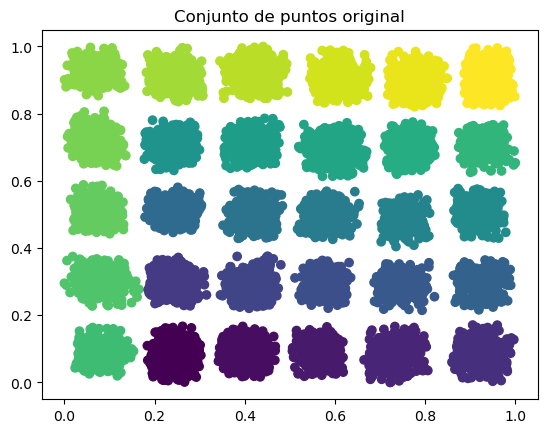

In [5]:
# Represento el conjunto de puntos en un eje bidimensional
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = dataset_df['color'])
plt.title("Conjunto de puntos original")
plt.show()

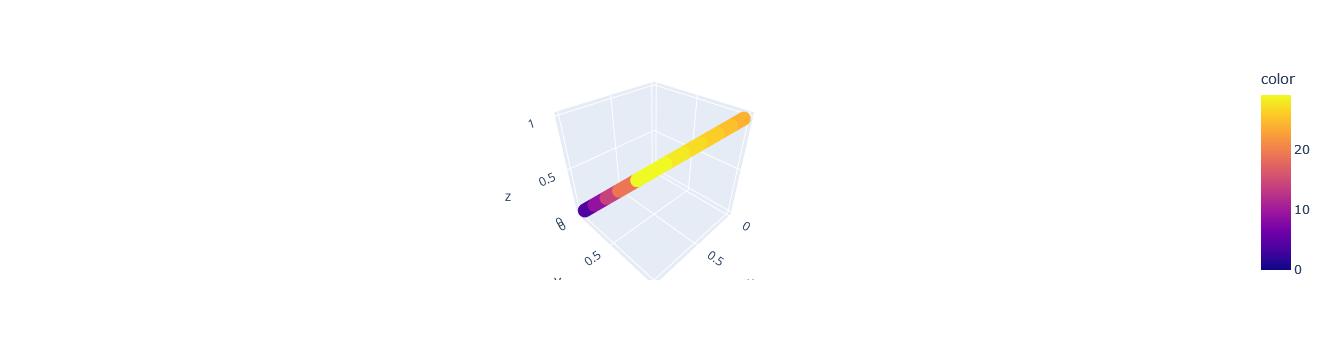

In [7]:
# Represento el conjunto de puntos en un eje tridimensional con Plotly
fig = px.scatter_3d(X, X[:, 0], X[:, 1], X[:, 1], color = dataset_df['color'])
fig.show()

In [18]:
## Instancio un objeto de la clase KMeans
from sklearn.cluster import KMeans

n_clusters = len(dataset_df['color'].unique())
model = KMeans(n_clusters= n_clusters, n_init = "auto")

# Entreno el modelo
model.fit(X)

KMeans(n_clusters=30, n_init='auto')

In [19]:
# Obtengo las etiquetas que el modelo ha asignado a los diferentes puntos, y las coordenadas de sus centroides
labels = model.labels_
centroids = model.cluster_centers_

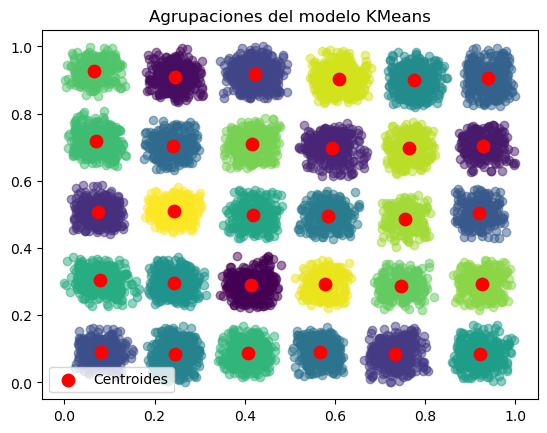

In [20]:
# Represento las agrupaciones del modelo KMeans en un eje bidimensional
plt.figure()

# Utilizo el colormap 'viridis'
cmap = plt.cm.viridis

# Genero n_clusters colores distintos del colormap
colors = cmap(np.linspace(0, 1, n_clusters))

for _ in range(n_clusters):
    plt.scatter(X[labels == _][:, 0], X[labels == _][:, 1], c = [colors[_]], alpha = 0.5)

# Represento los centroides de los clusters generados
plt.scatter(centroids[:, 0], centroids[:, 1], c = "red", s = 80, label = "Centroides")
plt.title("Agrupaciones del modelo KMeans")
plt.legend()
plt.show()